# ランダム射影

+ AA,Patel Python ではじめる教師なし学習 第3章 次元削減

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import os,time
import pickle,gzip

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl
%matplotlib inline
import plotly.express as px
import japanize_matplotlib
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from numpy.testing import assert_array_almost_equal

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve,average_precision_score

from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

In [8]:
#import xgboost as xgb
#import lightgbm as lgb

ModuleNotFoundError: No module named 'xgboost'

In [13]:
# pip install xgboost

     |████████████████████████████████| 781 kB 4.1 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /Users/tjst/miniforge3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/bl/tkwkj75j0svgcz6htbr5ltfw0000gn/T/pip-install-uo6a5skb/xgboost_f5c9583fefbd49dda9fe9c4da0351166/setup.py'"'"'; __file__='"'"'/private/var/folders/bl/tkwkj75j0svgcz6htbr5ltfw0000gn/T/pip-install-uo6a5skb/xgboost_f5c9583fefbd49dda9fe9c4da0351166/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/bl/tkwkj75j0svgcz6htbr5ltfw0000gn/T/pip-wheel-svckd6pb
       cwd: /private/var/folders/bl/tkwkj75j0svgcz6htbr5ltfw0000gn/T/pip-install-uo6a5skb/xgboost_f5c9583fefbd49dda9fe9c4da0351166/
  Complete output (1077 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  crea

In [14]:
# conda install xgboost

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - xgboost

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-arm64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-arm64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://conda.anaconda.org/conda-forge/osx-arm64
  - https://conda.anaconda.org/conda-forge/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [15]:
# pip install lightgbm

     |████████████████████████████████| 588 kB 4.3 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /Users/tjst/miniforge3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/bl/tkwkj75j0svgcz6htbr5ltfw0000gn/T/pip-install-pkeeqp1o/lightgbm_d63094fc79e04417b79820006bebfcde/setup.py'"'"'; __file__='"'"'/private/var/folders/bl/tkwkj75j0svgcz6htbr5ltfw0000gn/T/pip-install-pkeeqp1o/lightgbm_d63094fc79e04417b79820006bebfcde/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/bl/tkwkj75j0svgcz6htbr5ltfw0000gn/T/pip-wheel-amiv2q88
       cwd: /private/var/folders/bl/tkwkj75j0svgcz6htbr5ltfw0000gn/T/pip-install-pkeeqp1o/lightgbm_d63094fc79e04417b79820006bebfcde/
  Complete output (71 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  cre

## MNISTデータセットのロード

In [2]:
current_path=os.getcwd()
print(current_path)

file = os.path.sep.join(['','datasets','mnist_data','mnist.pkl'])

f = open(current_path+file,'rb')

train_set,validation_set,test_set = pickle.load(f,encoding='latin1')

f.close()

X_train,y_train=train_set[0],train_set[1]
X_validation,y_validation=validation_set[0],validation_set[1]
X_test,y_test=test_set[0],test_set[1]
print("X_train type=",type(X_train),"\nX_train shape=",X_train.shape)
print("y_train type=",type(y_train),"\ny_train shape=",y_train.shape)

print("X_validation type=",type(X_validation),"\nX_validation shape=",X_validation.shape)
print("y_validation type=",type(y_validation),"\ny_validation shape=",y_validation.shape)

print("X_test type=",type(X_test),"\nX_test shape=",X_test.shape)
print("y_test type=",type(y_test),"\ny_test shape=",y_test.shape)

/Users/tjst/21ds2/機械学習
X_train type= <class 'numpy.ndarray'> 
X_train shape= (50000, 784)
y_train type= <class 'numpy.ndarray'> 
y_train shape= (50000,)
X_validation type= <class 'numpy.ndarray'> 
X_validation shape= (10000, 784)
y_validation type= <class 'numpy.ndarray'> 
y_validation shape= (10000,)
X_test type= <class 'numpy.ndarray'> 
X_test shape= (10000, 784)
y_test type= <class 'numpy.ndarray'> 
y_test shape= (10000,)


## pandas dataframeへ変換

In [3]:
xlen=[len(u) for u in [X_train,X_validation,X_test]]
xlen

train_index=range(xlen[0])
validation_index=range(xlen[0],xlen[0]+xlen[1])
test_index=range(xlen[0]+xlen[1],xlen[0]+xlen[1]+xlen[2])

X_train=pd.DataFrame(data=X_train,index=train_index)
y_train=pd.Series(data=y_train,index=train_index)

X_validation=pd.DataFrame(data=X_validation,index=validation_index)
y_validation=pd.Series(data=y_validation,index=validation_index)

X_test=pd.DataFrame(data=X_test,index=test_index)
y_test=pd.Series(data=y_test,index=test_index)

In [4]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000739,0.000354,0.000204,0.000090,0.000071,0.000009,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022778,0.015422,0.012079,0.007217,0.007181,0.001483,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992188,0.992188,0.988281,0.988281,0.992188,0.242188,0.0,0.0,0.0,0.0


## 画像の表示

In [5]:
def view_digit(example):
    label=y_train[0]
    image=X_train.loc[example,:].values.reshape([28,28])
    plt.title('Example: {} Label:{}'.format(example,label))
    plt.imshow(image,cmap=plt.get_cmap('Oranges'))
    plt.show()

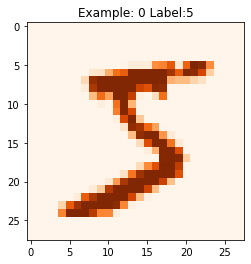

In [6]:
view_digit(0)

# 次元削減

## PCA

In [7]:
from sklearn.decomposition import PCA

n_components=783
whiten = False
random_state=2018
pca=PCA(n_components=n_components,whiten=whiten,random_state=random_state)

X_train_PCA=pca.fit_transform(X_train)

In [8]:
X_train_PCA=pd.DataFrame(data=X_train_PCA,index=train_index)

In [9]:
print("Vcariance Explained by all 784 principal components:",sum(pca.explained_variance_ratio_))

Vcariance Explained by all 784 principal components: 1.0000000903462558


In [10]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

In [11]:
for u in [9,19,49,99,199,299]:
    print('Variance Captured by First {} Principal Components'.format(u+1),importanceOfPrincipalComponents.loc[:,0:u].sum(axis=1).values)

Variance Captured by First 10 Principal Components [0.48876274]
Variance Captured by First 20 Principal Components [0.6439805]
Variance Captured by First 50 Principal Components [0.8248612]
Variance Captured by First 100 Principal Components [0.9146588]
Variance Captured by First 200 Principal Components [0.966501]
Variance Captured by First 300 Principal Components [0.98624915]


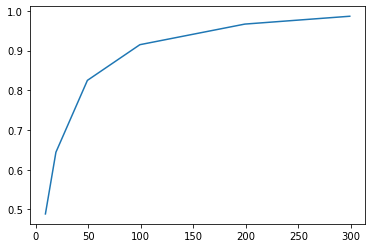

In [12]:
plt.plot([9,19,49,99,199,299],[importanceOfPrincipalComponents.loc[:,0:u].sum(axis=1).values[0] for u in [9,19,49,99,199,299]])

In [13]:
importanceOfPrincipalComponents[0].values[0]

0.09744381

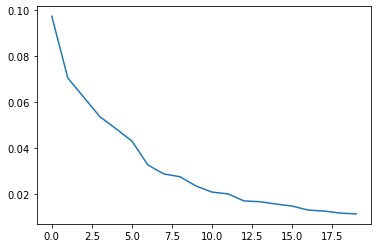

In [14]:
plt.plot(range(20),[importanceOfPrincipalComponents[u].values[0] for u in range(20)])

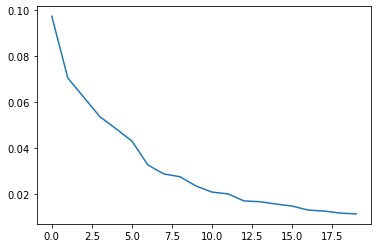

In [15]:
plt.plot(range(20),[importanceOfPrincipalComponents[u].values[0] for u in range(20)])

<BarContainer object of 50 artists>

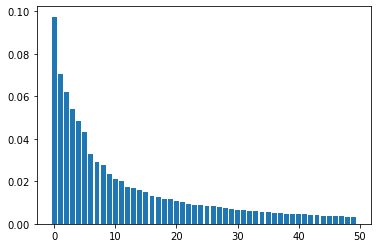

In [16]:
N=50
plt.bar(range(N),[importanceOfPrincipalComponents[u].values[0] for u in range(N)])

## 可視化 <font color="red" size=5>scatterPlot</font>

In [17]:
def scatterPlot(xDF,yDF,algoName):
    tempDF=pd.DataFrame(data=xDF.loc[:,0:1],index=xDF.index)
    tempDF=pd.concat((tempDF,yDF),axis=1,join="inner")
    tempDF.columns=["First Vector","Second Vector","Label"]
#    sns.pairplot(xDF.loc[:,0:1])
    sns.lmplot(x="First Vector",y="Second Vector",hue="Label",data=tempDF,fit_reg=False)
    ax=plt.gca()
    ax.set_title("Separation of Observation using"+algoName)

### 第一と第二主成分をplot

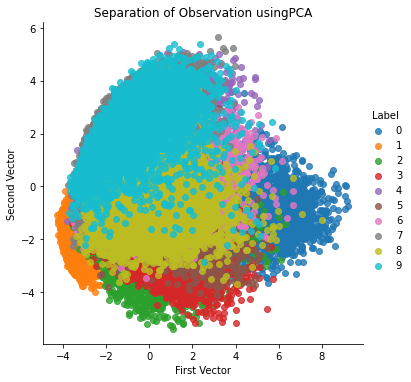

In [18]:
scatterPlot(X_train_PCA,y_train,"PCA")

#### indexが1000から2000までの1000個のみplotしたもの
+ 9と7が分離できていないことがわかる

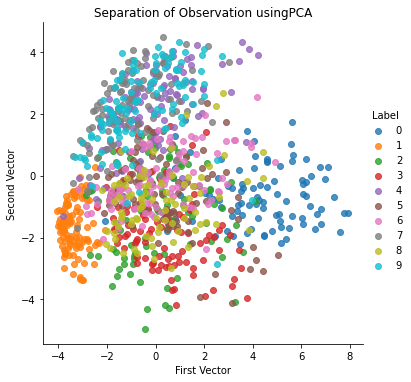

In [70]:
scatterPlot(X_train_PCA.loc[1000:2000,:],y_train.loc[1000:2000],"PCA")
#scatterPlot(X_train_PCA,y_train,"PCA")

## scatterPlot2 (0,i)成分をプロット

In [39]:
# 0,i主成分
def scatterPlot2(xDF,yDF,i,algoName):
    tempDF=pd.DataFrame(data=xDF.loc[:,[0,i]],index=xDF.index)
    tempDF=pd.concat((tempDF,yDF),axis=1,join="inner")
    tempDF.columns=["First Vector","Second Vector","Label"]
#    sns.pairplot(xDF.loc[:,0:1])
    sns.lmplot(x="First Vector",y="Second Vector",hue="Label",data=tempDF,fit_reg=False)
    ax=plt.gca()
    ax.set_title("Separation of Observation using"+algoName)

### 第一主成分と第3主成分をPlot

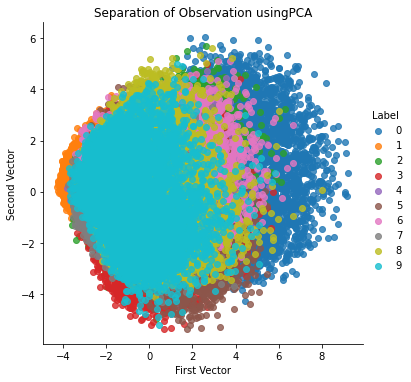

In [59]:
scatterPlot2(X_train_PCA,y_train,2,"PCA")

In [53]:
X_train_PCA.axes

[RangeIndex(start=0, stop=50000, step=1),
 RangeIndex(start=0, stop=783, step=1)]

In [54]:
X_train.axes

[RangeIndex(start=0, stop=50000, step=1),
 RangeIndex(start=0, stop=784, step=1)]

In [45]:
X_train.loc[[1,2],:].T

,1,2
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
779,0.0,0.0
780,0.0,0.0
781,0.0,0.0
782,0.0,0.0


### (i,j)成分を N1<=index<N2 についてプロットする


In [128]:
def scatterPlot0(xDF,yDF,i,j,algoName,N1,N2):
    tempDF=pd.DataFrame(data=xDF.loc[N1:N2,[i,j]],index=xDF.index)
    tempDF=pd.concat((tempDF,yDF.loc[N1:N2]),axis=1,join="inner")
    tempDF.columns=["First Vector","Second Vector","Label"]
    sns.lmplot(x="{}-th Vector",y="{}-th Vector".format(i,j),hue="Label",data=tempDF,fit_reg=False)
    ax=plt.gca()
    ax.set_title("Separation of Observation using"+algoName)

In [108]:
from numpy.random import randint

### 原データ10000個の(239,357)成分の散布図

239 357


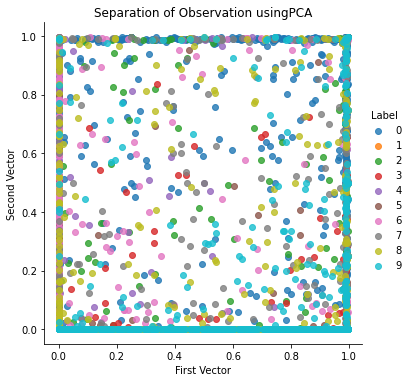

In [126]:
i,j=randint(200,500),randint(200,500)
print(i,j)
scatterPlot0(X_train,y_train,i,j,"PCA",0,10000)

### 50000個のデータの(239,357)成分をplotしたもの

239 357


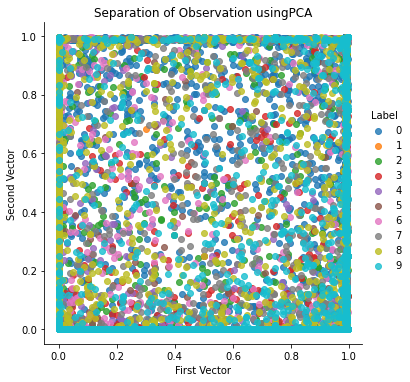

In [127]:
i,j=239,357
print(i,j)
scatterPlot0(X_train,y_train,i,j,"PCA",0,50000)

# Gaussian random projection

In [29]:
from sklearn.random_projection import GaussianRandomProjection

[RangeIndex(start=0, stop=50000, step=1), RangeIndex(start=0, stop=3, step=1)]


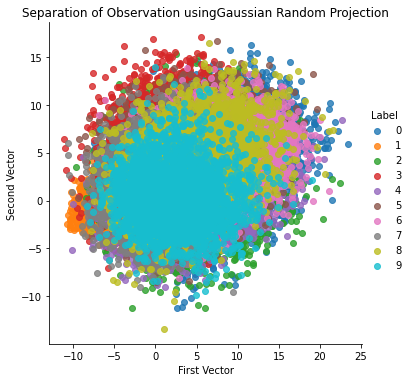

In [60]:
#GRP=GaussianRandomProjection(n_components='auto',eps=0.5,random_state=2018)
GRP=GaussianRandomProjection(n_components=3,eps='auto',random_state=2018)

X_train_GRP0=GRP.fit_transform(X_train)
X_train_GRP=pd.DataFrame(data=X_train_GRP0,index=train_index)

type(X_train_GRP0)

print(X_train_GRP.axes)

X_validation_GRP=GRP.transform(X_validation)
X_validation_GRP=pd.DataFrame(X_validation_GRP,index=validation_index)

scatterPlot(X_train_GRP,y_train,"Gaussian Random Projection")

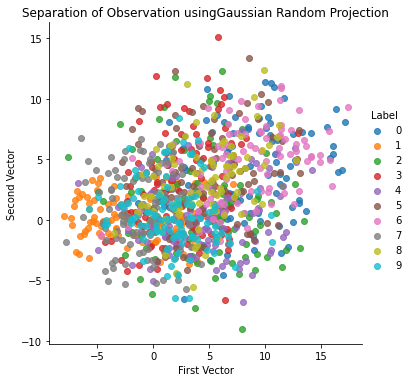

In [57]:
scatterPlot(X_train_GRP[:1000],y_train[:1000],"Gaussian Random Projection")

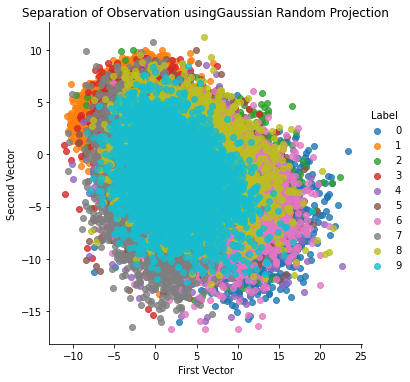

In [51]:
scatterPlot2(X_train_GRP,y_train,2,"Gaussian Random Projection")

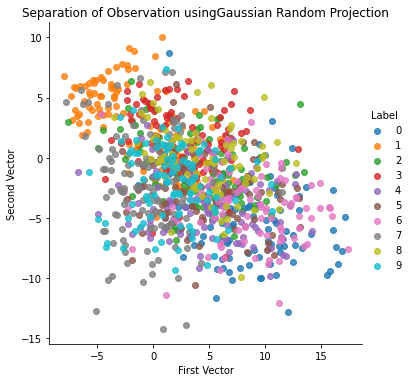

In [52]:
scatterPlot2(X_train_GRP[:1000],y_train[:1000],2,"Gaussian Random Projection")

    ValueError: eps=0.100000 and n_samples=50000 lead to a target dimension of 9274 which is larger than the original space with n_features=784
    ValueError: eps=0.200000 and n_samples=50000 lead to a target dimension of 2496 which is larger than the original space with n_features=784
    ValueError: eps=0.300000 and n_samples=50000 lead to a target dimension of 1202 which is larger than the original space with n_features=784
    eps=0.4   [RangeIndex(start=0, stop=50000, step=1), RangeIndex(start=0, stop=737, step=1)]
    eps=0.5.  [RangeIndex(start=0, stop=50000, step=1), RangeIndex(start=0, stop=519, step=1)]   
    eps=0.6.  [RangeIndex(start=0, stop=50000, step=1), RangeIndex(start=0, stop=400, step=1)]
    eps=0.7   [RangeIndex(start=0, stop=50000, step=1), RangeIndex(start=0, stop=331, step=1)]
    eps=0.999 [RangeIndex(start=0, stop=50000, step=1), RangeIndex(start=0, stop=259, step=1)]

[RangeIndex(start=0, stop=50000, step=1), RangeIndex(start=0, stop=259, step=1)]


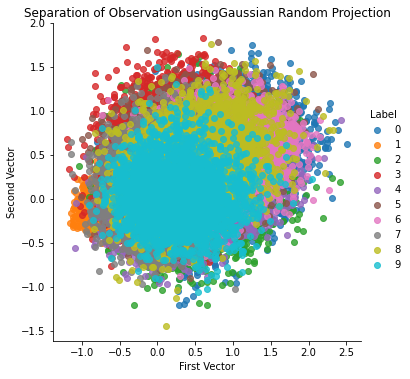

In [70]:
#GRP=GaussianRandomProjection(n_components='auto',eps=0.5,random_state=2018)
GRP=GaussianRandomProjection(n_components='auto',eps=0.999,random_state=2018)

X_train_GRP0=GRP.fit_transform(X_train)
X_train_GRP=pd.DataFrame(data=X_train_GRP0,index=train_index)

type(X_train_GRP0)

print(X_train_GRP.axes)

X_validation_GRP=GRP.transform(X_validation)
X_validation_GRP=pd.DataFrame(X_validation_GRP,index=validation_index)

scatterPlot(X_train_GRP,y_train,"Gaussian Random Projection")

# sparce random projection

In [32]:
from sklearn.random_projection import SparseRandomProjection

[RangeIndex(start=0, stop=50000, step=1), RangeIndex(start=0, stop=3, step=1)]


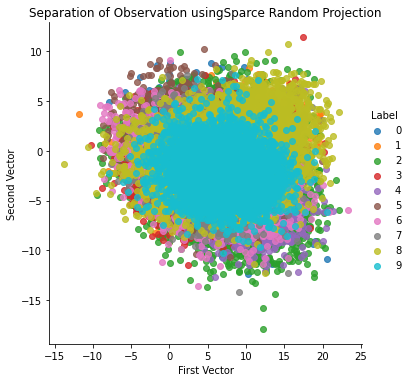

In [36]:
#GRP=GaussianRandomProjection(n_components='auto',eps=0.5,random_state=2018)
SRP=SparseRandomProjection(n_components=3,eps='auto',random_state=2018)

X_train_SRP0=SRP.fit_transform(X_train)
X_train_SRP=pd.DataFrame(data=X_train_SRP0,index=train_index)

type(X_train_SRP0)

print(X_train_SRP.axes)

X_validation_SRP=SRP.transform(X_validation)
X_validation_SRP=pd.DataFrame(X_validation_SRP,index=validation_index)

scatterPlot(X_train_SRP,y_train,"Sparce Random Projection")

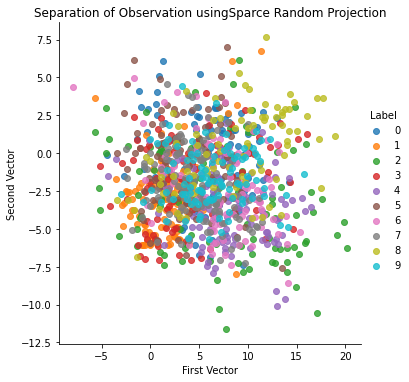

In [37]:
scatterPlot(X_train_SRP[:1000],y_train[:1000],"Sparce Random Projection")

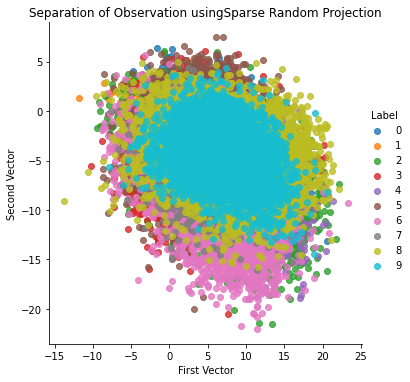

In [40]:
scatterPlot2(X_train_SRP,y_train,2,"Sparse Random Projection")

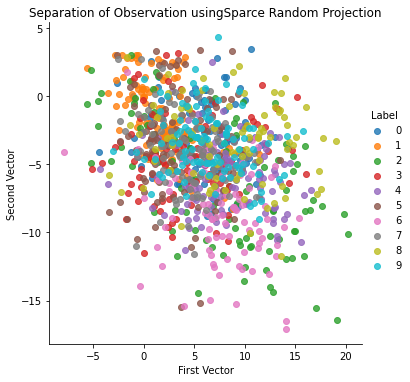

In [41]:
scatterPlot2(X_train_SRP[:1000],y_train[:1000],2,"Sparce Random Projection")

    ValueError: eps=0.100000 and n_samples=50000 lead to a target dimension of 9274 which is larger than the original space with n_features=784
    ValueError: eps=0.200000 and n_samples=50000 lead to a target dimension of 2496 which is larger than the original space with n_features=784
    ValueError: eps=0.300000 and n_samples=50000 lead to a target dimension of 1202 which is larger than the original space with n_features=784
    eps=0.4   [RangeIndex(start=0, stop=50000, step=1), RangeIndex(start=0, stop=737, step=1)]
    eps=0.5.  [RangeIndex(start=0, stop=50000, step=1), RangeIndex(start=0, stop=519, step=1)]   
    eps=0.6.  [RangeIndex(start=0, stop=50000, step=1), RangeIndex(start=0, stop=400, step=1)]
    eps=0.7   [RangeIndex(start=0, stop=50000, step=1), RangeIndex(start=0, stop=331, step=1)]
    eps=0.999 [RangeIndex(start=0, stop=50000, step=1), RangeIndex(start=0, stop=259, step=1)]

[RangeIndex(start=0, stop=50000, step=1), RangeIndex(start=0, stop=259, step=1)]


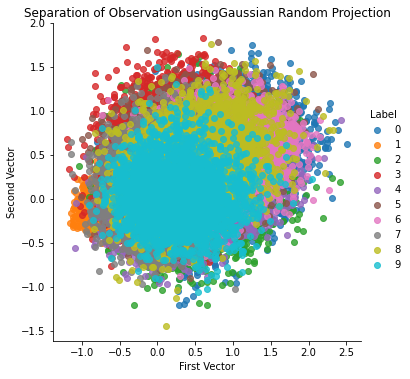

In [70]:
#GRP=GaussianRandomProjection(n_components='auto',eps=0.5,random_state=2018)
GRP=GaussianRandomProjection(n_components='auto',eps=0.999,random_state=2018)

X_train_GRP0=GRP.fit_transform(X_train)
X_train_GRP=pd.DataFrame(data=X_train_GRP0,index=train_index)

type(X_train_GRP0)

print(X_train_GRP.axes)

X_validation_GRP=GRP.transform(X_validation)
X_validation_GRP=pd.DataFrame(X_validation_GRP,index=validation_index)

scatterPlot(X_train_GRP,y_train,"Gaussian Random Projection")

# Isomap

In [19]:
from sklearn.manifold import Isomap

(50000, 10)
(10000, 10)


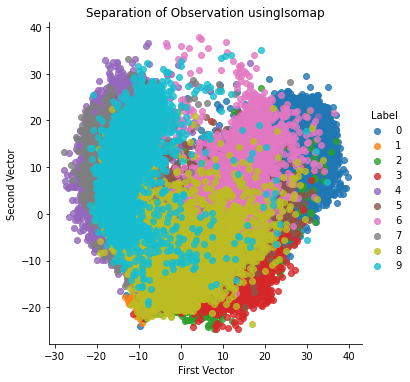

In [20]:
n_neighbors=5
n_components=10
n_jobs=4

isomap=Isomap(n_neighbors=n_neighbors,n_components=n_components,n_jobs=n_jobs)

isomap.fit(X_train.loc[0:5000,:])

X_train_isomap0=isomap.transform(X_train)
print(X_train_isomap0.shape)
X_train_isomap=pd.DataFrame(data=X_train_isomap0,index=train_index)

X_validation_isomap0= isomap.transform(X_validation)
print(X_validation_isomap0.shape)
X_validation_isomap=pd.DataFrame(data=X_validation_isomap0,index=validation_index)

scatterPlot(X_train_isomap,y_train,"Isomap")

In [21]:
%time 2+2

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs


4

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 10 µs
(50000, 20)
(10000, 20)


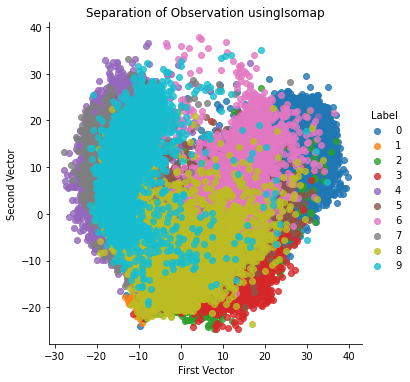

In [53]:
%timeit
n_neighbors=5
#次を増やす
n_components=20
n_jobs=4

isomap=Isomap(n_neighbors=n_neighbors,n_components=n_components,n_jobs=n_jobs)

isomap.fit(X_train.loc[0:5000,:])

X_train_isomap0=isomap.transform(X_train)
print(X_train_isomap0.shape)
X_train_isomap=pd.DataFrame(data=X_train_isomap0,index=train_index)

X_validation_isomap0= isomap.transform(X_validation)
print(X_validation_isomap0.shape)
X_validation_isomap=pd.DataFrame(data=X_validation_isomap0,index=validation_index)

scatterPlot(X_train_isomap,y_train,"Isomap")

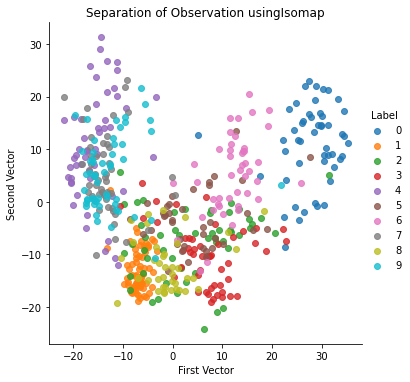

In [54]:
scatterPlot(X_train_isomap.iloc[:500,:],y_train[:500],"Isomap")

(50000, 50)
(10000, 50)


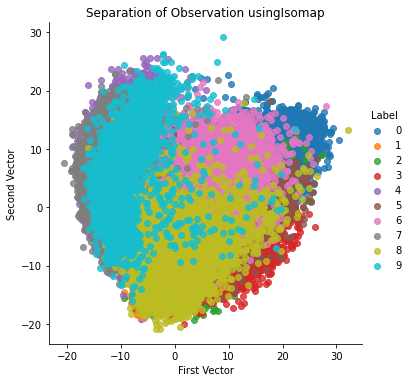

In [55]:
%timeit
#次を増やす

n_neighbors=10
n_components=50
n_jobs=4

isomap=Isomap(n_neighbors=n_neighbors,n_components=n_components,n_jobs=n_jobs)

isomap.fit(X_train.loc[0:5000,:])

X_train_isomap0=isomap.transform(X_train)
print(X_train_isomap0.shape)
X_train_isomap=pd.DataFrame(data=X_train_isomap0,index=train_index)

X_validation_isomap0= isomap.transform(X_validation)
print(X_validation_isomap0.shape)
X_validation_isomap=pd.DataFrame(data=X_validation_isomap0,index=validation_index)

scatterPlot(X_train_isomap,y_train,"Isomap")

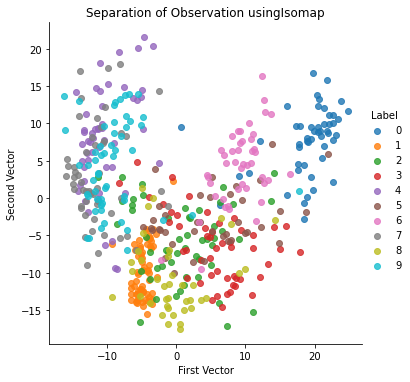

In [56]:
scatterPlot(X_train_isomap.iloc[:500,:],y_train[:500],"Isomap")